# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Setting display options for better viewing

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)     # Show 100 rows

# Loading the main training data

In [3]:
app_train_df = pd.read_csv('../data/raw/application_train.csv')

In [4]:
print("Shape of the training data:", app_train_df.shape)
app_train_df.head()

Shape of the training data: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# A concise summary of the dataframe to see what we're dealing with
app_train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Target Variable Distribution:
 TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13552\2206952367.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=app_train_df, palette='Set2')


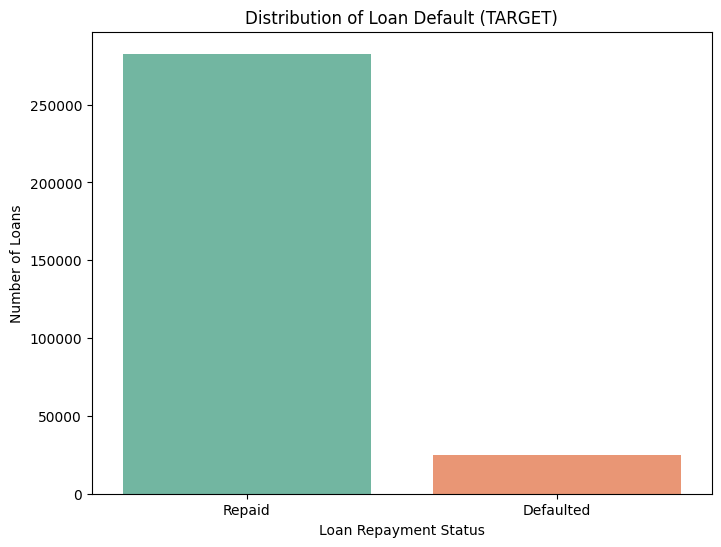

In [6]:
# Calculate the distribution of the target variable 
target_distribution = app_train_df['TARGET'].value_counts(normalize=True) * 100
print("Target Variable Distribution:\n", target_distribution)

# Visualizing the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=app_train_df, palette='Set2')
plt.title('Distribution of Loan Default (TARGET)')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Number of Loans')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.show()

# Understanding features

In [7]:
# Seperate columns by data type
categorical_cols = app_train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = app_train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# removing the ID and target from the numerical features list
numerical_cols.remove('SK_ID_CURR')
numerical_cols.remove('TARGET')

print(f"Number of Categorical Features: {len(categorical_cols)}")
print(f"Number of Numerical Features: {len(numerical_cols)}")

Number of Categorical Features: 16
Number of Numerical Features: 104


In [8]:
# Get summary of numerical features
app_train_df[numerical_cols].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0

### From the summary it's can be obsereved that the 'DAYS_EMPLOYED' columns has some anomalies, let's look into that

In [9]:
# Create a new dataframe to analyze the anomaly
anamoly_df = app_train_df[app_train_df['DAYS_EMPLOYED'] == 365243]
print(f"Number of anomalous employment records: {len(anamoly_df)}")

# Compare the default rate of the anomalous records with the rest
normal_employement_default_rate = app_train_df[app_train_df['DAYS_EMPLOYED'] != 365243]['TARGET'].mean()
anomalous_employement_default_rate = anamoly_df['TARGET'].mean()

print(f"Default rate for normal employment records: {normal_employement_default_rate:.2%}")
print(f"Default rate for anomalous employment records: {anomalous_employement_default_rate:.2%}")

Number of anomalous employment records: 55374
Default rate for normal employment records: 8.66%
Default rate for anomalous employment records: 5.40%


- A significant amount people have this placeholder value, so it can't just be ignored

- This group also has a significantly lower default rate

### Let's clean this feature now

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\2285547955.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)


Text(0.5, 0, 'Days Employed')

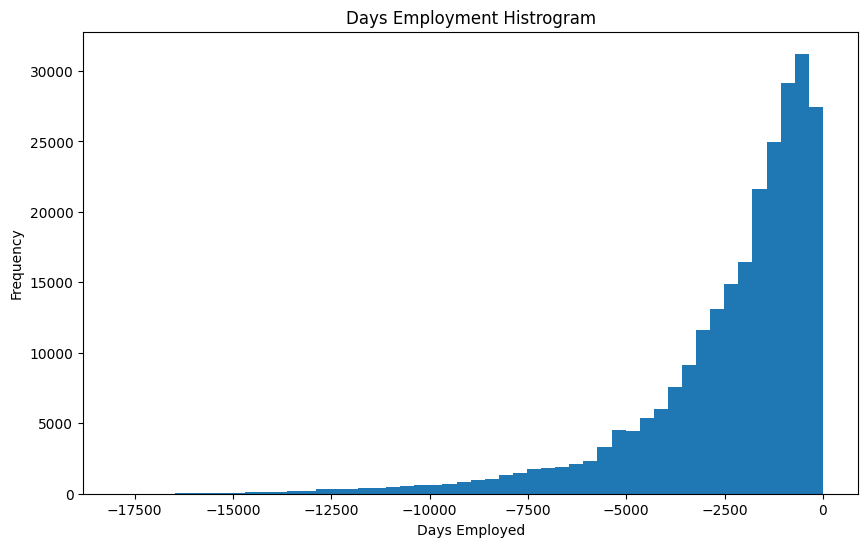

In [10]:
# Creating an anomaly flag column
app_train_df['DAYS_EMPLOYED_ANOMALY'] = (app_train_df['DAYS_EMPLOYED'] == 365243)

# Replacing the anomaly with NaN
app_train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Visualizing the distribution of DAYS_EMPLOYED after cleaning
app_train_df['DAYS_EMPLOYED'].plot.hist(title = "Days Employment Histrogram", bins=50, figsize=(10, 6))
plt.xlabel('Days Employed')

### Another feature that i'll take care of now is 'YEARS_BIRTH', this value is given in days, let's transfrom it to years

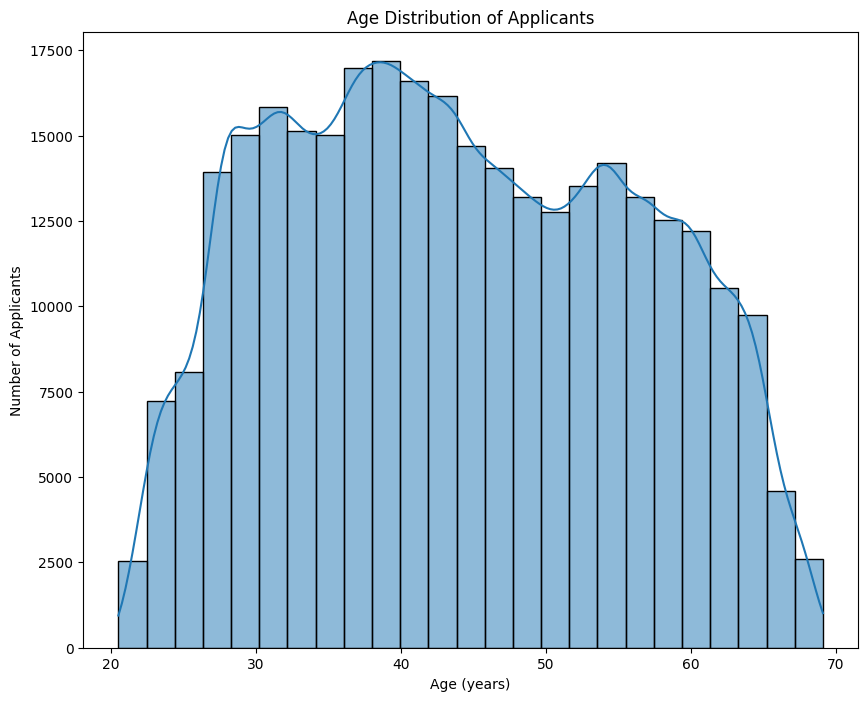

In [11]:
# Convert DAYS_BIRTH from negative days to positive years
app_train_df['YEARS_BIRTH'] = app_train_df['DAYS_BIRTH'] / -365

# Plot the age distribution
plt.figure(figsize=(10, 8))
sns.histplot(app_train_df['YEARS_BIRTH'], bins=25, kde=True)
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (years)')
plt.ylabel('Number of Applicants')
plt.show()

## Relationship between the features and the 'TARGET' variable

### Age vs. Default Rate

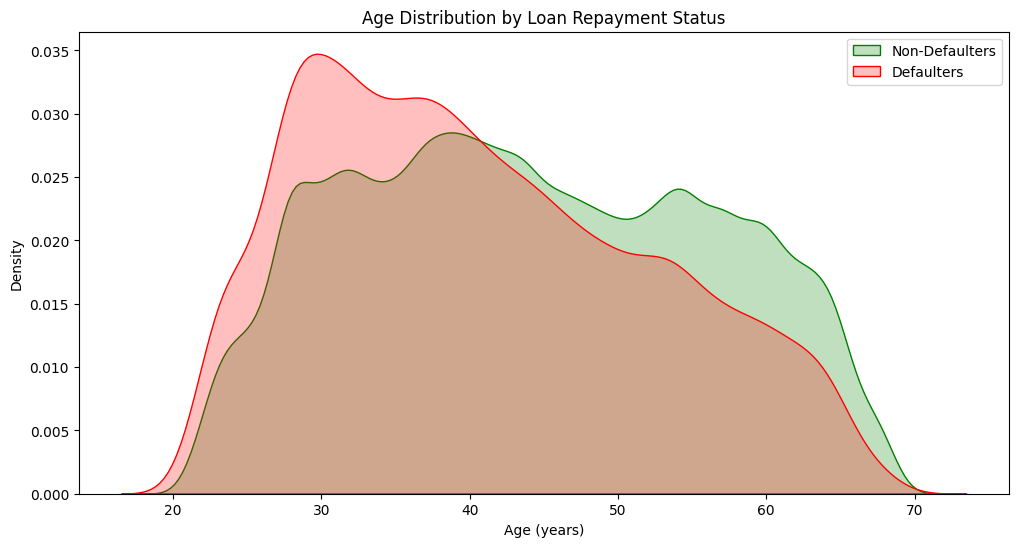

In [12]:
plt.figure(figsize=(12, 6))

# Plot the KDE for non-defaulters
sns.kdeplot(app_train_df[app_train_df['TARGET'] == 0]['YEARS_BIRTH'], 
            label='Non-Defaulters', 
            color='green', 
            fill=True)

# Plot the KDE for defaulters
sns.kdeplot(app_train_df[app_train_df['TARGET'] == 1]['YEARS_BIRTH'], 
            label='Defaulters',
            color='red', 
            fill=True)

plt.title('Age Distribution by Loan Repayment Status')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.show()

This plot shows that younger people are more likely to be defaulters, hence 'YEARS_BIRTH' feature is a valuable predictor for my model

#### We have more than 100 numerical features, so visualizing the relationship of every single one with 'TARGET' is impractical.

#### Let's calculate a correlation matrix instead

In [13]:
# Calculate the correlation matrix
correlations = app_train_df[numerical_cols + ['TARGET']].corr()['TARGET'].sort_values()

# Display the top 15 most positive and negative correlations
print('Top 15 Most Positive Correlations:\n', correlations.tail(15))
print('\nTop 15 Most Negative Correlations:\n', correlations.head(15))

Top 15 Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 15 Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIV

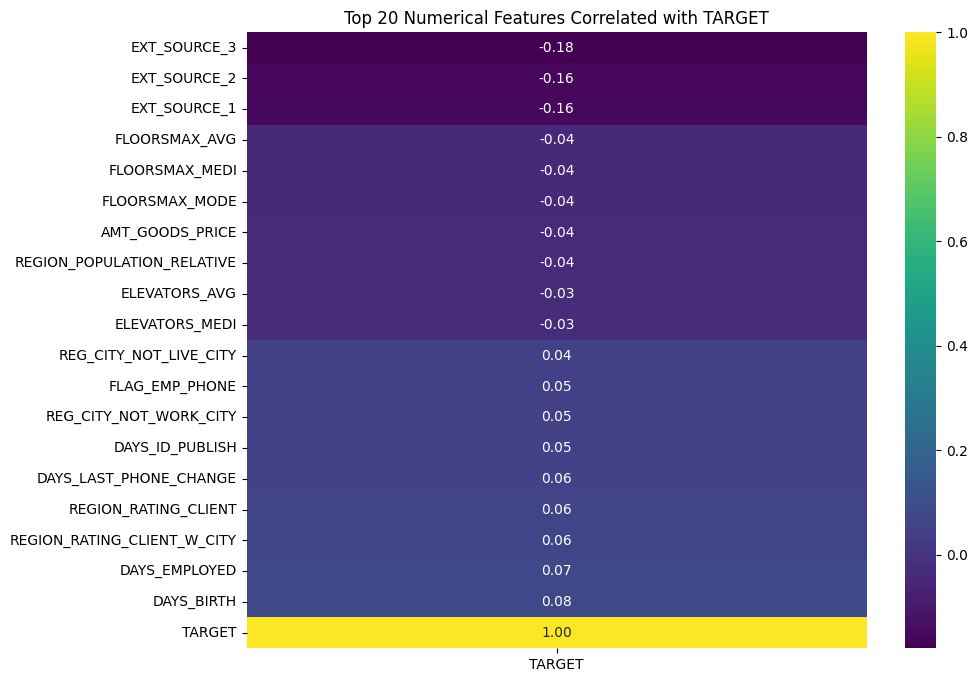

In [14]:
# Extracting the top 10 most correlated features (both positive and negative)
top_corr_features = pd.concat([correlations.head(10), correlations.tail(10)])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_features.to_frame(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Top 20 Numerical Features Correlated with TARGET')
plt.show()

#### Saving top features for future use

In [15]:
# Create lists of top correlated features
top_pos_corr_features = correlations.tail(11).head(10).index.tolist()
top_neg_corr_features = correlations.head(10).index.tolist()

print("Top 10 Positively Correlated Features:\n", top_pos_corr_features)
print("\nTop 10 Negatively Correlated Features:\n", top_neg_corr_features)

Top 10 Positively Correlated Features:
 ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

Top 10 Negatively Correlated Features:
 ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI']


## Now let's explore some non-linear relations

Many features like 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY' etc. are very important when to comes to predicting whether a person will default or not. But the correlation matrix doesn't show a strong relation between 'TARGET' and such features, this because these features must have a non-linear relation with 'TARGET'. Let's explore those realtions now.

### 'AMT_INCOME_TOTAL'

I'll group 'AMT_INCOME_TOTAL' into quantile bins ('Lowest', 'Low', 'Medium', 'High', 'Highest') to explore this relation

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\2209045683.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_bin_default_rate = app_train_df.groupby('INCOME_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100


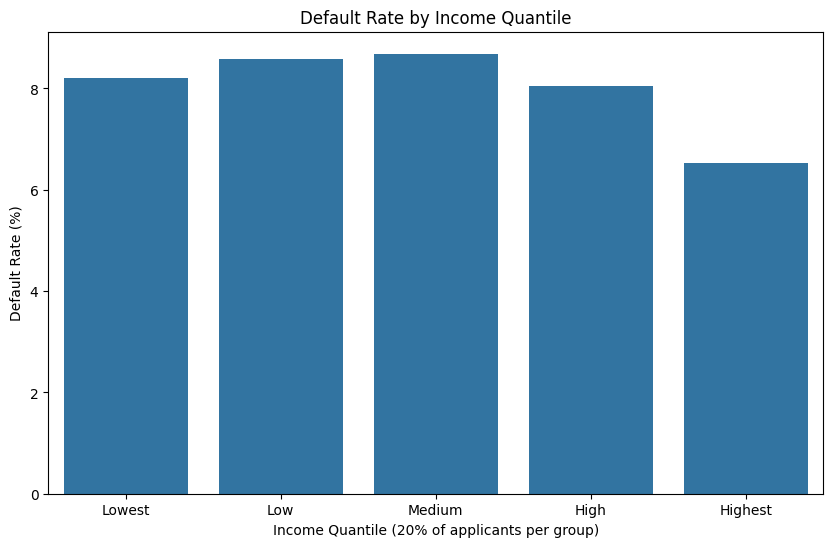

In [16]:
# Create quantile-based income bins
app_train_df['INCOME_QUANTILE_BINS'] = pd.qcut(app_train_df['AMT_INCOME_TOTAL'], 
                                                q=5, 
                                                labels=['Lowest', 'Low', 'Medium', 'High', 'Highest'])

# Calculate and plot the default rate by income quantile
quantile_bin_default_rate = app_train_df.groupby('INCOME_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=quantile_bin_default_rate.index, y=quantile_bin_default_rate.values)
plt.title('Default Rate by Income Quantile')
plt.xlabel('Income Quantile (20% of applicants per group)')
plt.ylabel('Default Rate (%)')
plt.show()

This graph shows that for the bottom 60% of earners, default rate is high and it gradually decreases in top 40%

Let's do a similar of some other promising features

## 'AMT_CREDIT'

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\708564732.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_bin_default_rate = app_train_df.groupby('CREDIT_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100


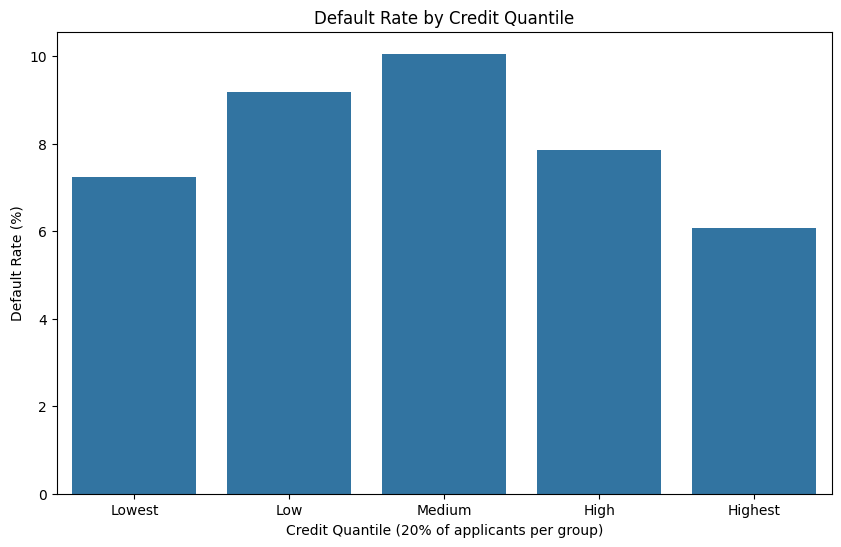

In [17]:
# Create quantile-based credit bins
app_train_df['CREDIT_QUANTILE_BINS'] = pd.qcut(app_train_df['AMT_CREDIT'], 
                                                q=5, 
                                                labels=['Lowest', 'Low', 'Medium', 'High', 'Highest'])

# Calculate and plot the default rate by credit quantile
quantile_bin_default_rate = app_train_df.groupby('CREDIT_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=quantile_bin_default_rate.index, y=quantile_bin_default_rate.values)
plt.title('Default Rate by Credit Quantile')
plt.xlabel('Credit Quantile (20% of applicants per group)')
plt.ylabel('Default Rate (%)')
plt.show()

This figure clearly show a U-shaped relationship between 'AMT_CREDIT' and 'TARGET'. The safest group is the one with a medium amount of credit, and both high credit and low credit groups are risky candidates compared to medium.

## 'AMT_ANNUITY'

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\4157860009.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_bin_default_rate = app_train_df.groupby('ANNUITY_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100


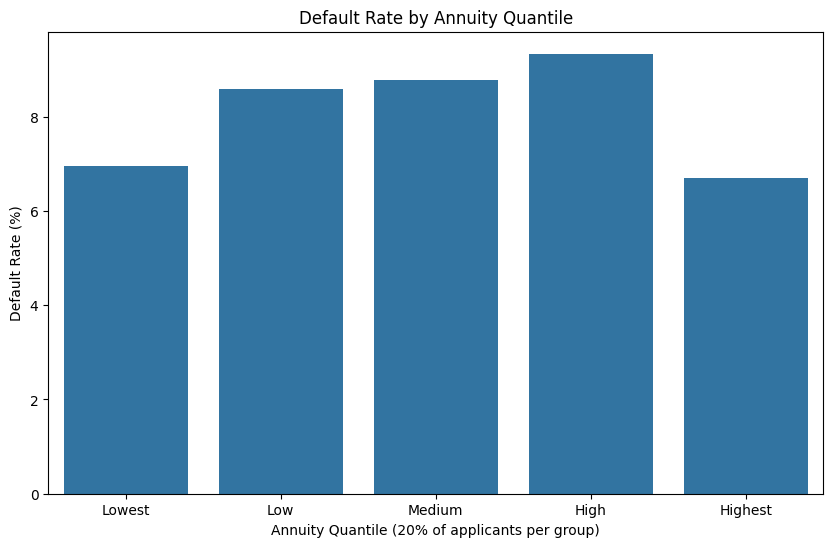

In [18]:
# Create quantile-based credit bins
app_train_df['ANNUITY_QUANTILE_BINS'] = pd.qcut(app_train_df['AMT_ANNUITY'], 
                                                q=5, 
                                                labels=['Lowest', 'Low', 'Medium', 'High', 'Highest'])

# Calculate and plot the default rate by annuity quantile
quantile_bin_default_rate = app_train_df.groupby('ANNUITY_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=quantile_bin_default_rate.index, y=quantile_bin_default_rate.values)
plt.title('Default Rate by Annuity Quantile')
plt.xlabel('Annuity Quantile (20% of applicants per group)')
plt.ylabel('Default Rate (%)')
plt.show()

## 'AMT_GOODS_PRICE'

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\4250597474.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_bin_default_rate = app_train_df.groupby('GOODS_PRICE_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100


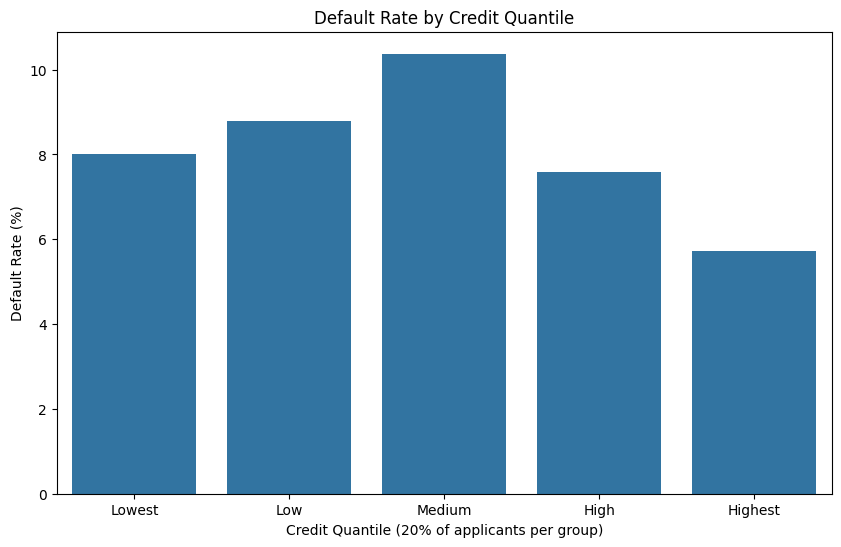

In [19]:
# Create quantile-based Goods price bins
app_train_df['GOODS_PRICE_QUANTILE_BINS'] = pd.qcut(app_train_df['AMT_GOODS_PRICE'], 
                                                q=5, 
                                                labels=['Lowest', 'Low', 'Medium', 'High', 'Highest'])

# Calculate and plot the default rate by income quantile
quantile_bin_default_rate = app_train_df.groupby('GOODS_PRICE_QUANTILE_BINS')['TARGET'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=quantile_bin_default_rate.index, y=quantile_bin_default_rate.values)
plt.title('Default Rate by Credit Quantile')
plt.xlabel('Credit Quantile (20% of applicants per group)')
plt.ylabel('Default Rate (%)')
plt.show()

This feature also has a clear U-shaped relation with 'TARGET'

## 'OWN_CAR_AGE'

The 'OWN_CAR_AGE' columns carries some missing values, these missing values most probably represent people who do not own a car. This is a large and important group, so to represent that, let's create a flag feature

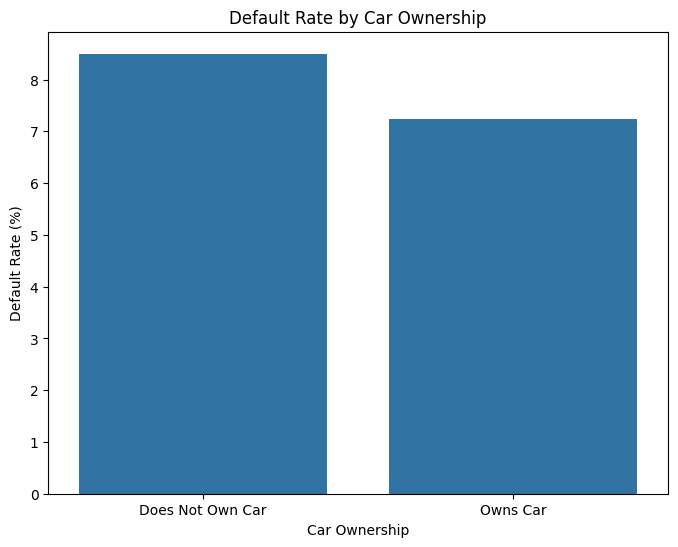

FLAG_OWN_CAR
0    8.500017
1    7.244076
Name: TARGET, dtype: float64


In [20]:
# Create the FLAG_OWN_CAR feature
app_train_df['FLAG_OWN_CAR'] = app_train_df['OWN_CAR_AGE'].notna().astype(int)

# Calculate and plot the default rate
car_owner_default_rate = app_train_df.groupby('FLAG_OWN_CAR')['TARGET'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=car_owner_default_rate.index, y=car_owner_default_rate.values)
plt.title('Default Rate by Car Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Default Rate (%)')
plt.xticks([0, 1], ['Does Not Own Car', 'Owns Car'])
plt.show()

print(car_owner_default_rate)

There is a clear difference between the group that owns a car and the group that doesn't. A difference of more than 1% in default rate, with the group that doesn't own a car having higher default rate

Now let's take a good at the group that own a car

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\4019027167.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car_age_default_rate = car_owners_df.groupby('CAR_AGE_BINS')['TARGET'].mean() * 100


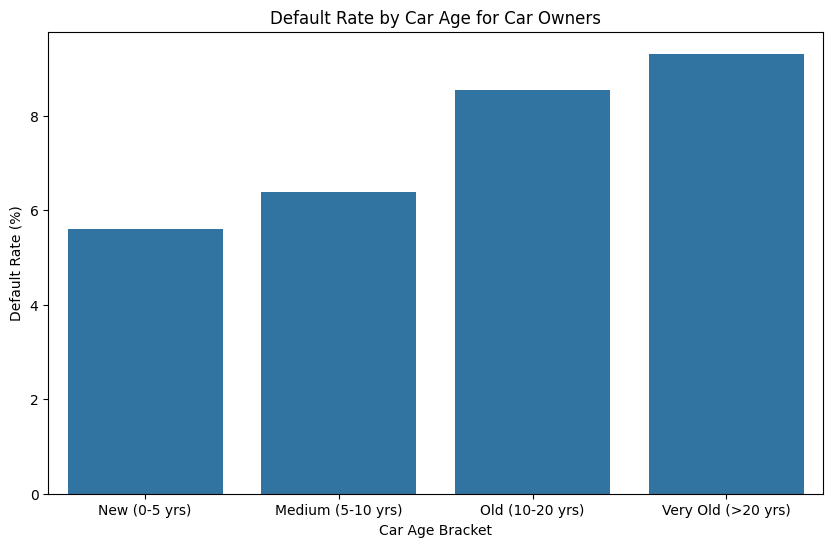

In [21]:
# Create a new dataframe containing only car owners
car_owners_df = app_train_df[app_train_df['FLAG_OWN_CAR'] == 1].copy()

# Create car age bins using pd.cut
car_owners_df['CAR_AGE_BINS'] = pd.cut(car_owners_df['OWN_CAR_AGE'], 
                                        bins=[0, 5, 10, 20, 100], 
                                        labels=['New (0-5 yrs)', 'Medium (5-10 yrs)', 'Old (10-20 yrs)', 'Very Old (>20 yrs)'])

# Calculate and plot the default rate by car age bin
car_age_default_rate = car_owners_df.groupby('CAR_AGE_BINS')['TARGET'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=car_age_default_rate.index, y=car_age_default_rate.values)
plt.title('Default Rate by Car Age for Car Owners')
plt.xlabel('Car Age Bracket')
plt.ylabel('Default Rate (%)')
plt.show()

As the age of an applicant's car increases, their likelihood of defaulting on a loan also increases significantly. The owners of "Very Old" cars (over 20 years) have the highest default rate by a large margin.

For now i'll drop the bins i created so they won't be a hinderance when handling missing values, i'll deal with these later in feature engineering

In [22]:
bins_to_drop = ['INCOME_QUANTILE_BINS', 'CREDIT_QUANTILE_BINS', 'ANNUITY_QUANTILE_BINS', 'GOODS_PRICE_QUANTILE_BINS']
app_train_df.drop(columns=bins_to_drop, inplace=True)
# CAR_AGE_BINS was only added for car owners_df, it's not in the main app_train_df

# Categorical Features

In [23]:
# Display summary of categorical features
for col in categorical_cols:
    print(f"--- {col} ---")
    print(app_train_df[col].value_counts())
    print("\n")

--- NAME_CONTRACT_TYPE ---
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


--- CODE_GENDER ---
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


--- FLAG_OWN_CAR ---
FLAG_OWN_CAR
0    202929
1    104582
Name: count, dtype: int64


--- FLAG_OWN_REALTY ---
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


--- NAME_TYPE_SUITE ---
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


--- NAME_INCOME_TYPE ---
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


--- NAME_EDUCATION_TYPE --

## Categorical features vs. Default rate

Now let's look into the relationships between all the significant categorical features and default rates, for each feature, looking at default rates for different categories through a histogram will help me get a good feel of the data

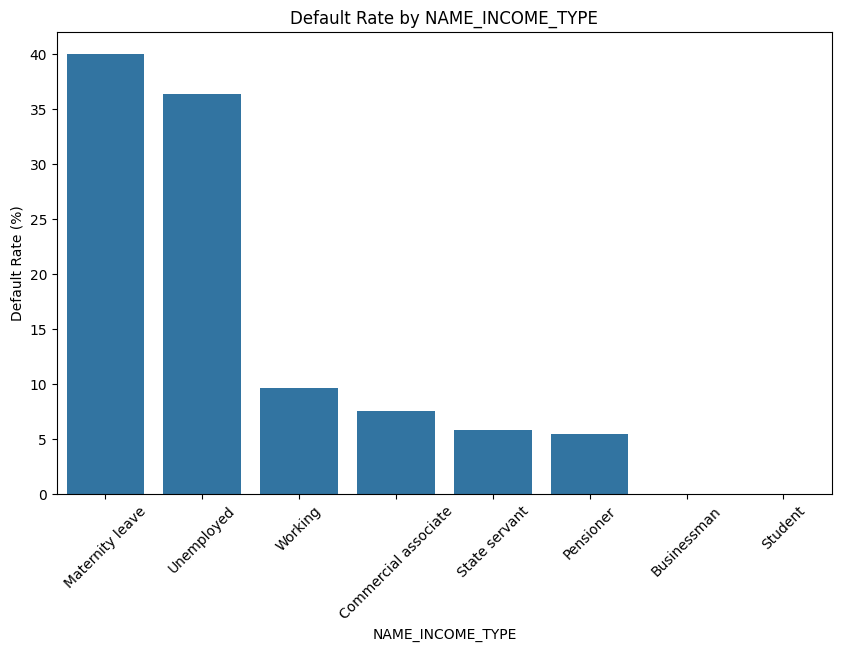

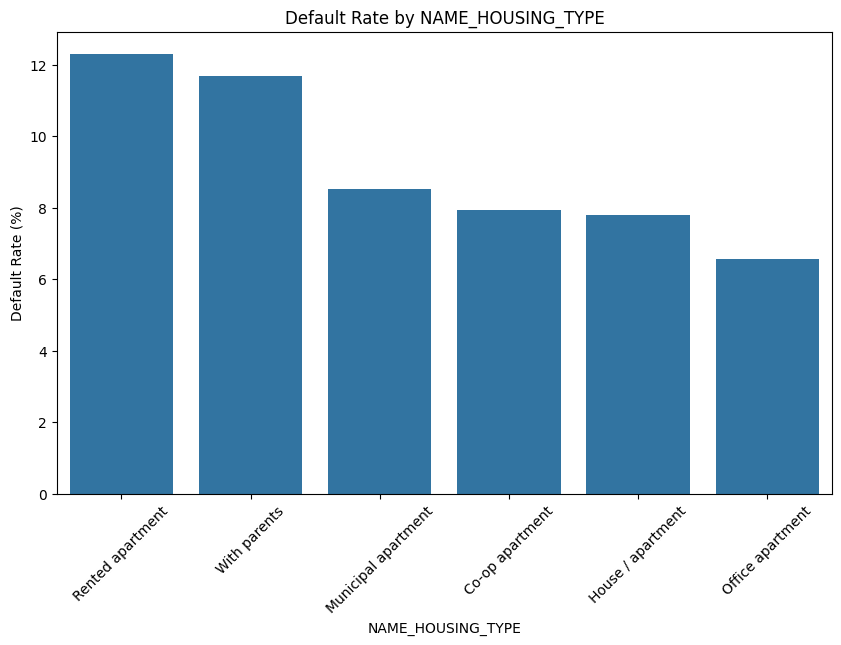

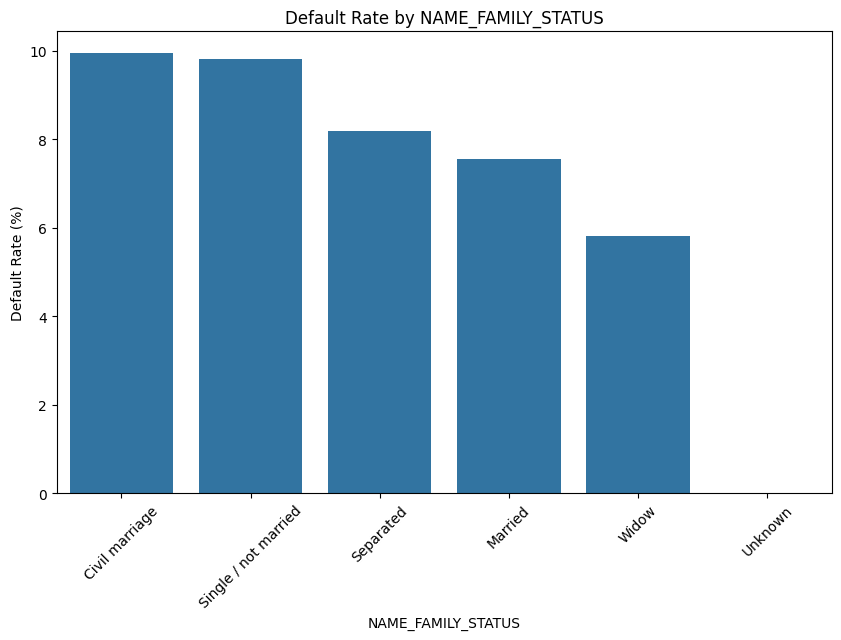

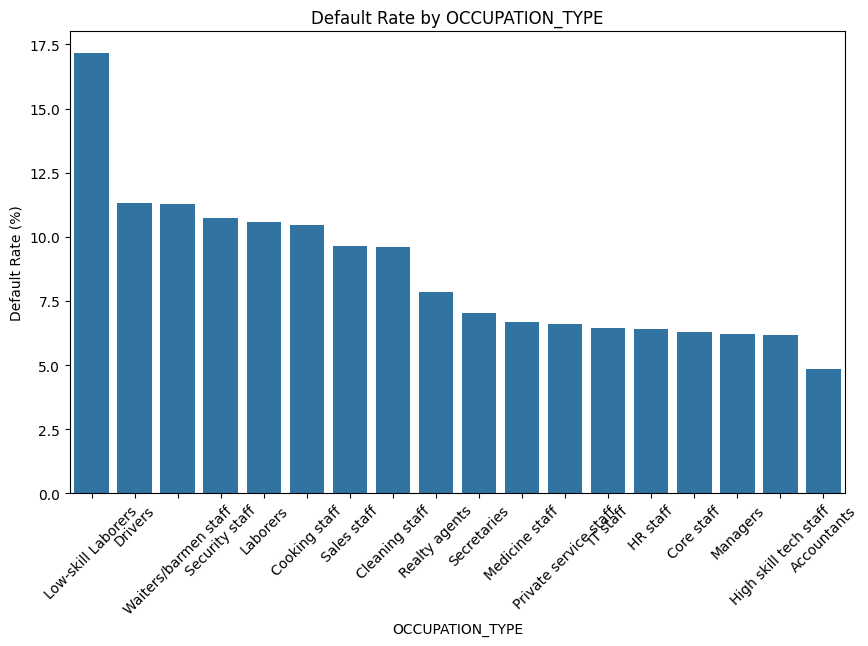

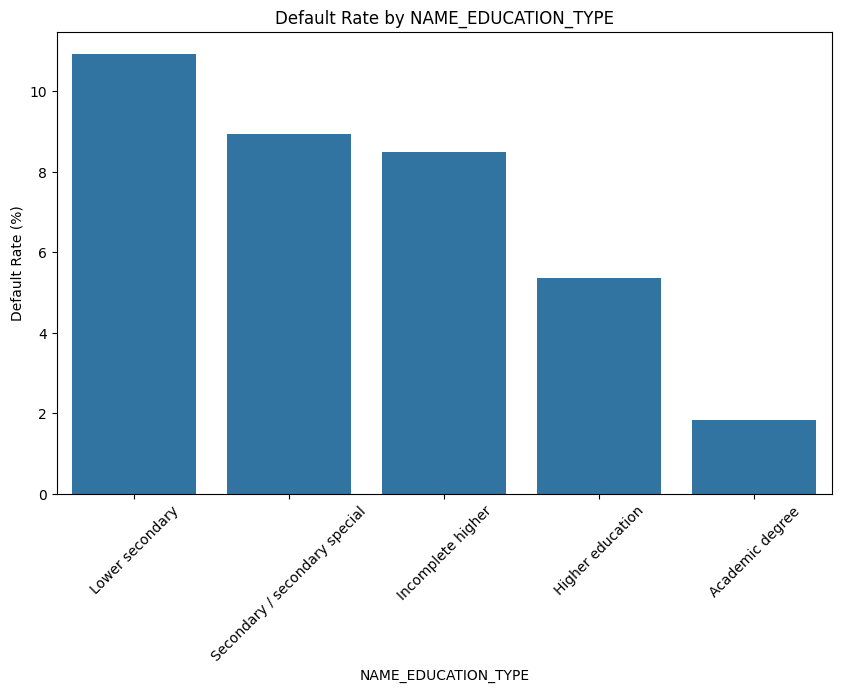

In [24]:
# List of key categorical features to analyze
categorical_features_to_plot = ['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE']

for col in categorical_features_to_plot:
    # Calculate default rates
    default_rate = app_train_df.groupby(col)['TARGET'].mean().sort_values(ascending=False) * 100
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=default_rate.index, y=default_rate.values)
    plt.title(f'Default Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Default Rate (%)')
    plt.xticks(rotation=45)
    plt.show()

These plots gives a good insight into the relationship of these features with the TARGET variable. 
Here's a quick summary of what the data is telling us:

- Income Type: This is a very strong predictor. Applicants on 'Maternity leave' and the 'Unemployed' have dramatically higher default rates. 'Businessman' and 'Student' have a 0% default rate in this dataset, likely due to their small sample size.

- Housing Type: Living in a 'Rented apartment' or 'With parents' is associated with the highest risk. People who own their own 'House / apartment' are among the safest.

- Family Status: Applicants in a 'Civil marriage' or who are 'Single / not married' have the highest default rates.

- Occupation Type: There's a clear trend where lower-skilled jobs like 'Low-Skill Laborers' have the highest risk, while professional roles like 'Accountants' and 'Managers' have the lowest.

- Education Type: as the level of education increases, the loan default rate consistently decreases. Applicants with a 'Lower secondary' education have the highest risk, while those with an 'Academic degree' have by far the lowest risk.

# MISSING VALUES

In [25]:
# Calculate the percentage of missing values for each column
missing_values = app_train_df.isnull().sum() / len(app_train_df) * 100
missing_values_sorted = missing_values.sort_values(ascending=False)

# Display the top 20 columns with the most missing values
print("Top 20 Columns with Missing Values (%):\n")
print(missing_values_sorted.head(20))

Top 20 Columns with Missing Values (%):

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
dtype: float64


A lot of columns have a huge amount of missing data. Let's drop the columns that have more than 50% of data missing 

In [26]:
# Identify columns with more than 50% missing values
columns_to_drop = missing_values[missing_values_sorted > 50].index.tolist()

# Drop columns with more than 50% missing values
app_train_df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped {len(columns_to_drop)} columns with more than 50% missing values.")

Dropped 41 columns with more than 50% missing values.


Now, let's handle the remaining columns with missing values

- We'll handle the missing data in numerical columns by replacing them with median instead of mean. As many columns contain outliers, mean will be affected by them, because of which median(middle value) is the safer and more robust choice.

- For categorical columns, we'll be replacing the missing data with mode(most probable choice) since we can't calculate mean or median because they are not numbers. This is a safe and logical assumption.

We have a special case in categorical columns. My observation of the summary of these columns reveal that in the 'ORGANIZATION_TYPE' column, the missing represents pensioners/retirees, so instead of replacing these values with the mode, we'll replace these with 'Pensioner'

In [27]:
# We'll replace 'XNA' in the 'ORGANIZATION_TYPE' column with 'Pensioner'
app_train_df['ORGANIZATION_TYPE'].replace({'XNA': 'Pensioner'}, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_13552\2429700582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_train_df['ORGANIZATION_TYPE'].replace({'XNA': 'Pensioner'}, inplace=True)


Now let's handle the remaining missing values with the general method

In [28]:
# Impute missing values in numerical columns with median
numerical_cols = [col for col in numerical_cols if col not in columns_to_drop]
numerical_imputer = SimpleImputer(strategy='median')
app_train_df[numerical_cols] = numerical_imputer.fit_transform(app_train_df[numerical_cols])

In [29]:
# Impute missing values in categorical columns with mode
categorical_cols = [col for col in categorical_cols if col not in columns_to_drop]
categorical_imputer = SimpleImputer(strategy='most_frequent')
app_train_df[categorical_cols] = categorical_imputer.fit_transform(app_train_df[categorical_cols])

In [30]:
# Verify that there are no more missing values
print("Missing values after imputation:")
print(app_train_df.isnull().sum().sum())

Missing values after imputation:
0


All missing values are taken care of

# Saving the clean data

In [31]:
# Define the path for the processed data
processed_data_path = '../data/processed/application_train_cleaned.csv'

# Save the dataframe to a CSV file
app_train_df.to_csv(processed_data_path, index=False)

print(f"Cleaned data saved to: {processed_data_path}")

Cleaned data saved to: ../data/processed/application_train_cleaned.csv
